# Grouping

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

Grouping is aggregating data based on the values in a column or columns. This is similar to pivoting in Excel. This is done calling the `groupby()` method associated with the DataFrame. Into this, you pass the column you would like to group. Grouping always requires two steps: First, you say the column you would like to group. Then, you specify how you would like to aggregate the numerical columns.


In [2]:
tips = sns.load_dataset('tips')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


If we wanted to browse by a few aggregated statistics, we could start getting the averages of the columns using `mean()`

In [15]:
tips.mean()

total_bill    19.785943
tip            2.998279
size           2.569672
pct            0.160803
dtype: float64

But what if we wanted to break this down by different categories. That is where grouping comes in.

## Grouping Steps

### Step 1: Specify the Columns to Group By

To create a grouped object, we call the `groupby()` method associated with the DataFrame. For this, you must pass the column (or columns) you would like the data to be grouped by.

In [9]:
tips.groupby('sex')

If you would like to group by more than one column, pass them in as a list.

In [10]:
tips.groupby(['sex','smoker','time'])

### Step 2: Aggregate the Data

So far, there's nothing to really see yet. This is because to present it, we need to tell the object how to aggregate the data.

In [11]:
tips.groupby('sex').mean()

,total_bill,tip,size,pct
sex,,,,
Male,20.744076,3.089618,2.630573,0.157651
Female,18.056897,2.833448,2.459770,0.166491


In [16]:
tips.groupby(['sex','smoker','time']).mean()

total_bill       tip      size       pct
sex    smoker time                                            
Male   Yes    Lunch    17.374615  2.790769  2.153846  0.166662
              Dinner   23.642553  3.123191  2.595745  0.148929
       No     Lunch    18.486500  2.941500  2.500000  0.165706
              Dinner   20.130130  3.158052  2.766234  0.159360
Female Yes    Lunch    17.431000  2.891000  2.300000  0.175270
              Dinner   18.215652  2.949130  2.217391  0.185142
       No     Lunch    15.902400  2.459600  2.520000  0.157091
              Dinner   20.004138  3.044138  2.655172  0.156774

If you would like to aggregate a few different ways you can pass these as a list into the `agg()` method.

In [21]:
tips.groupby(['sex','smoker','time']).agg(['mean','median'])

total_bill               tip             size         \
                           mean  median      mean median      mean median   
sex    smoker time                                                          
Male   Yes    Lunch   17.374615  16.000  2.790769  2.200  2.153846      2   
              Dinner  23.642553  23.100  3.123191  3.000  2.595745      2   
       No     Lunch   18.486500  16.975  2.941500  2.405  2.500000      2   
              Dinner  20.130130  18.290  3.158052  3.000  2.766234      2   
Female Yes    Lunch   17.431000  14.845  2.891000  2.500  2.300000      2   
              Dinner  18.215652  16.320  2.949130  3.000  2.217391      2   
       No     Lunch   15.902400  13.420  2.459600  2.000  2.520000      2   
              Dinner  20.004138  17.310  3.044138  3.000  2.655172      2   

                           pct            
                          mean    median  
sex    smoker time                        
Male   Yes    Lunch   0.166662  0.154321  
              Dinner  0.148929  0.129422  
       No     Lunch   0.165706  0.165223  
              Dinner  0.159360  0.157604  
Female Yes    Lunch   0.175270  0.155808  
              Dinner  0.185142  0.174765  
       No     Lunch   0.157091  0.146886  
              Dinner  0.156774  0.150152

We can simplify this a bit by just looking at the `tip` column

In [23]:
tips.groupby(['sex','smoker','time'])['tip'].agg(['mean','median','std'])

mean  median       std
sex    smoker time                              
Male   Yes    Lunch   2.790769   2.200  1.095738
              Dinner  3.123191   3.000  1.596451
       No     Lunch   2.941500   2.405  1.485623
              Dinner  3.158052   3.000  1.497034
Female Yes    Lunch   2.891000   2.500  1.057286
              Dinner  2.949130   3.000  1.306243
       No     Lunch   2.459600   2.000  1.078369
              Dinner  3.044138   3.000  1.117885

### Resetting the Index

You can flatten the data again at any stage by calling the `reset_index()` method.

In [95]:
tips.groupby(['sex','smoker','time']).mean().reset_index()

,sex,smoker,time,total_bill,tip,size,pct
0,Male,Yes,Lunch,17.374615,2.790769,2.153846,0.166662
1,Male,Yes,Dinner,23.642553,3.123191,2.595745,0.148929
2,Male,No,Lunch,18.486500,2.941500,2.500000,0.165706
3,Male,No,Dinner,20.130130,3.158052,2.766234,0.159360
4,Female,Yes,Lunch,17.431000,2.891000,2.300000,0.175270
5,Female,Yes,Dinner,18.215652,2.949130,2.217391,0.185142
6,Female,No,Lunch,15.902400,2.459600,2.520000,0.157091
7,Female,No,Dinner,20.004138,3.044138,2.655172,0.156774


## Resampling 

Grouping data into higher-level time chunks is known as resampling. 

In [31]:
weather = pd.read_csv('data/weather.csv')
weather.head()

,date,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,...,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,precipitation_inches,cloud_cover,events,wind_dir_degrees,zip_code
0,8/29/2013,74.0,68.0,61.0,61.0,58.0,56.0,93.0,75.0,57.0,...,10.0,10.0,23.0,11.0,28.0,0,4.0,NaN,286.0,94107
1,8/30/2013,78.0,69.0,60.0,61.0,58.0,56.0,90.0,70.0,50.0,...,10.0,7.0,29.0,13.0,35.0,0,2.0,NaN,291.0,94107
2,8/31/2013,71.0,64.0,57.0,57.0,56.0,54.0,93.0,75.0,57.0,...,10.0,10.0,26.0,15.0,31.0,0,4.0,NaN,284.0,94107
3,9/1/2013,74.0,66.0,58.0,60.0,56.0,53.0,87.0,68.0,49.0,...,10.0,10.0,25.0,13.0,29.0,0,4.0,NaN,284.0,94107
4,9/2/2013,75.0,69.0,62.0,61.0,60.0,58.0,93.0,77.0,61.0,...,10.0,6.0,23.0,12.0,30.0,0,6.0,NaN,277.0,94107


Converting the `date` column to a datetime format.

In [32]:
weather['date'] = pd.to_datetime(weather['date'])

Setting this as the index.

In [33]:
weather.set_index('date', inplace=True)

<AxesSubplot:xlabel='date'>

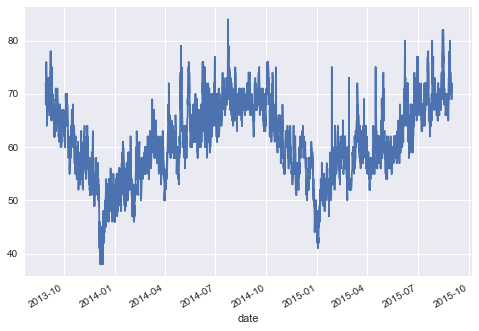

In [35]:
weather['mean_temperature_f'].plot()

Because this is sampling data from every day, this is quite fuzzy and noisy. It would make for a cleaner graph if we just plotted the monthly averages. To do this, we can use `resample()` and then `mean()`.

In [103]:
df = weather.resample('M').mean()

The dates still include the day of the month, even though we are going with monthly averages. To fix this, we can us `to_period()`. This will round the dates off to whatever period you specify. Here we will round of to months, by passing `M` into it.

In [58]:
df.index = df.index.to_period('M')

In [60]:
df.head()

,max_temperature_f,mean_temperature_f,min_temperature_f,max_dew_point_f,mean_dew_point_f,min_dew_point_f,max_humidity,mean_humidity,min_humidity,max_sea_level_pressure_inches,...,min_sea_level_pressure_inches,max_visibility_miles,mean_visibility_miles,min_visibility_miles,max_wind_Speed_mph,mean_wind_speed_mph,max_gust_speed_mph,cloud_cover,wind_dir_degrees,zip_code
date,,,,,,,,,,,,,,,,,,,,,
2013-08,79.866667,70.466667,61.666667,61.866667,59.000000,56.066667,89.266667,70.933333,49.000000,30.037333,...,29.934000,10.000000,10.000000,9.800000,18.533333,6.800000,22.928571,2.400000,277.400000,94325
2013-09,77.400000,67.253333,57.140000,57.813333,53.320000,48.280000,83.766667,65.660000,43.406667,29.967600,...,29.863867,10.000000,9.946667,9.540000,18.360000,6.433333,24.164286,1.906667,311.833333,94325
2013-10,71.787097,60.774194,49.967742,50.103226,44.400000,39.200000,79.683871,61.051613,39.122581,30.061161,...,29.933355,10.000000,9.561290,8.206452,15.838710,4.425806,24.227642,1.767742,290.058065,94325
2013-11,65.953333,56.093333,46.500000,48.700000,43.400000,37.860000,84.900000,66.446667,44.153333,30.131133,...,30.001267,9.980000,9.520000,7.773333,13.666667,3.366667,19.301587,1.960000,253.240000,94325
2013-12,58.967742,48.019355,37.393548,41.006452,34.251613,28.264516,82.154839,62.741935,39.412903,30.240194,...,30.101742,9.993548,9.387097,7.729032,12.322581,2.774194,19.627907,1.251613,244.109677,94325


<AxesSubplot:xlabel='date'>

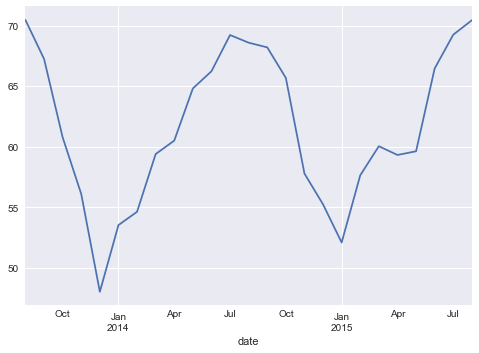

In [72]:
df['mean_temperature_f'].plot()

<AxesSubplot:xlabel='date'>

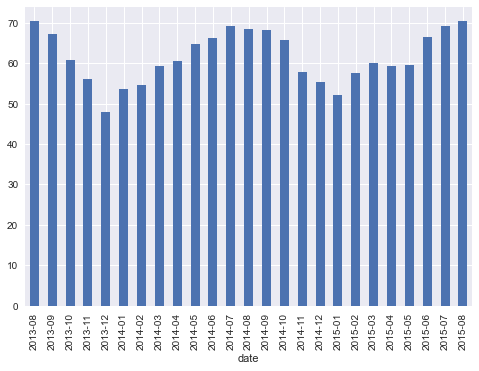

In [79]:
df['mean_temperature_f'].plot.bar()